In [1]:
#########
# 06/11/2023
# APRENDIZADO DE MAQUINA NÃO SUPERVISIONADO
# Clusters
# Pipeline: Sequencia de processamentos com os dados até se alcançar o modelo ideal
#1. Normalizar
#2. Balancear
#3. Determinar os hiperparâmetros (em cluster - numero de clusters a serem obtidos)
#4. Treinameneto
#5. Avaliação

In [2]:
#3. DETERMINAÇÃO DO NUMERO OTIMO DE CLUSTERS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #Carregando o indutor do KMeans
from scipy.spatial.distance import cdist #para calcular as distâncias relativas a cada centroide em cada ensaio
import numpy as np
import math

#Abrir os dados
diagnostic = pd.read_csv('C:/Users/Kaique.Fernandes/Documents/GitHub/DataScience/Classificadores_Atv3/Docs/breast_cancer_wisconsin_diagnostic/wdbc.data',sep = ',')
#Somente números na base
diagnostic_atributos = diagnostic.drop(columns='Diagnosis')
diagnostic

#Treinamento com os dados desbalanceados
#Segmentar os dados
dados_classes = diagnostic['Diagnosis']
dados_atributos = diagnostic.drop(columns = ['Diagnosis'])


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

C:\Users\Kaique.Fernandes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kaique.Fernandes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kaique.Fernandes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will cha

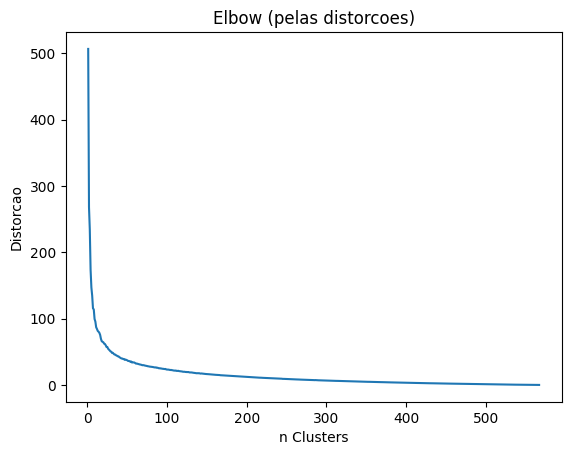

In [4]:
#DETERMINAR O NUMERO DE CLUSTERS PELO MÉTODO DO COTOVELO (Elbow)
#Distorções
distorcoes = []
K = range(1,568) #Range intervalo aberto à direita
for k in K:
  diagnostic_kmeans_model = KMeans(n_clusters=k).fit(diagnostic_atributos)
  distorcoes.append(
      sum(np.min(
          cdist(diagnostic_atributos,diagnostic_kmeans_model.cluster_centers_,'euclidean'), axis =1
      )/diagnostic.shape[0])
  )
distorcoes

#Mostrar no gráfico e salvar imagem
#preparar os objetos do gráfico
fig, ax = plt.subplots()
ax.plot(K, distorcoes)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorcao', title = 'Elbow (pelas distorcoes)')
fig.savefig('elbow_iris_distorcao.png')
plt.show()

In [5]:
#Calcular o número ideal de clusters
x0 = K[0]
y0 = distorcoes[0]

x1 = K[len(K)-1]
y1 = distorcoes[len(distorcoes)-1]

print('Pares inicial e final do grafico das distorcoes:')
print('Primeiro par:', x0,',',y0)
print('Útimo par: ', x1,',',y1)

distancias = []
for i in range(len(distorcoes)):
  x = K[i]
  y = distorcoes[i]
  numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
  denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
  distancias.append(numerador/denominador)

print(distancias)
print('maior ditância')
print(np.max(distancias))
print('Posicao da maior distancia dentro da matriz distancias')
print(distancias.index(np.max(distancias)))
print(K[distancias.index(np.max(distancias))])


Pares inicial e final do grafico das distorcoes:
Primeiro par: 1 , 506.82293668850815
Útimo par:  567 , 0.01394131798961587
[2.4068274982222802e-14, 177.04975859354658, 201.46953374961475, 246.18000725654204, 265.434262015803, 273.8862224326477, 287.5461415281878, 288.07732671462446, 298.1820495632296, 300.4149687356155, 306.0903742367799, 307.32477222194956, 308.92248821929843, 309.09239811311045, 309.6846330221363, 311.3617435314409, 315.13563958824295, 317.1312842429781, 317.131975824196, 316.9585073126105, 317.8819826674933, 317.54186115314843, 318.3489148847917, 319.6203665590378, 318.88617501105745, 320.2441942764135, 320.50823645646176, 320.80550834775124, 321.2304736949076, 320.9017620981952, 321.66846744647194, 320.87584032257575, 321.27260804523996, 321.38494874852387, 320.7893335695511, 320.96436208384296, 320.67255048372834, 320.68890696599647, 320.1027994195772, 320.2508533351212, 320.22144046577625, 320.1225210190143, 319.9030687945904, 319.2567031518918, 319.191433839733

In [6]:
#maior distância
n_clusters_otimo =K[distancias.index(np.max(distancias))]
print('Numero ideal de clusters:',K[distancias.index(np.max(distancias))])

Numero ideal de clusters: 31


In [7]:
#TREINAR O MODELO DEFINITIVO DE ACORDO COM O NUMERO IDEAL DE CLUSTERS
diagnostic_kmeans_model = KMeans(n_clusters=n_clusters_otimo).fit(diagnostic_atributos)
print('Centroides obtidos:')
print(diagnostic_kmeans_model.cluster_centers_)

#salvar o modelo
from pickle import  dump
dump(diagnostic_kmeans_model,open('C:/Users/Kaique.Fernandes/Documents/GitHub/DataScience/Classificadores_Atv3/diagnostic_kmeans_model_1.pkl','wb'))

Centroides obtidos:
[[1.88337500e+01 2.13131250e+01 1.23850000e+02 1.10012500e+03
  9.84293750e-02 1.36573125e-01 1.60794375e-01 8.92900000e-02
  1.95512500e-01 5.96812500e-02 6.45575000e-01 1.18741875e+00
  4.37343750e+00 7.63162500e+01 6.13156250e-03 3.07868750e-02
  4.16606250e-02 1.40848750e-02 2.04050000e-02 3.68750000e-03
  2.30181250e+01 2.91543750e+01 1.52950000e+02 1.60762500e+03
  1.41787500e-01 3.60200000e-01 4.66700000e-01 1.81031250e-01
  3.33800000e-01 8.68775000e-02]
 [1.28459677e+01 1.83100000e+01 8.26746774e+01 5.08137097e+02
  9.06806452e-02 7.90014516e-02 4.51084677e-02 2.67069839e-02
  1.71783871e-01 6.09203226e-02 2.69225806e-01 1.08118548e+00
  1.91061935e+00 2.10438710e+01 6.03219355e-03 2.02580806e-02
  2.42858532e-02 9.08545161e-03 1.95403226e-02 3.20273065e-03
  1.41306452e+01 2.39274194e+01 9.19387097e+01 6.10714516e+02
  1.22097419e-01 1.99687419e-01 1.83832290e-01 7.85130806e-02
  2.77554839e-01 7.83487097e-02]
 [2.43733333e+01 2.28500000e+01 1.63033333e+02

C:\Users\Kaique.Fernandes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier() #Constrói o meta estimador para treinamento
atr_train, atr_test, class_train, class_test = train_test_split(dados_atributos, dados_classes, test_size =0.3 )
# print(class_test)

In [9]:
#Treinar o modelo
fertility_tree = tree.fit(atr_train, class_train)
#Testar (avaliar) o modelo
Class_predict = fertility_tree.predict(atr_test)
# print(Class_predict)

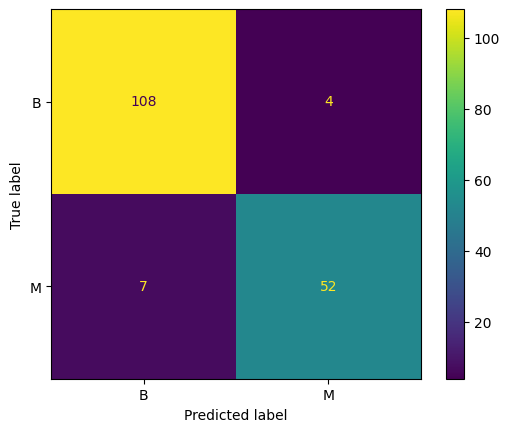

In [10]:
#MATRIZ DE CONTINGÊNCIA
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(class_test, Class_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = fertility_tree.classes_)
disp.plot()
plt.show()